In [1]:
# IMPORT THE RELEVANT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# LOAD THE DATA

In [4]:
raw_data = pd.read_csv(r'C:\Users\Abuyuwa\Desktop\HR_comma_sep.csv')
raw_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
raw_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# DECLARE THE DEPENDENT AND INDEPENDENT VARIABLES 

In [7]:
x1 = raw_data[['satisfaction_level', 'average_montly_hours','promotion_last_5years','salary']]
y = raw_data['left']

In [8]:
# FIND MISSING VALUES AND EXPLORE THE DATA TOKNOW THE RELEVANT FEATURES

In [9]:
raw_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

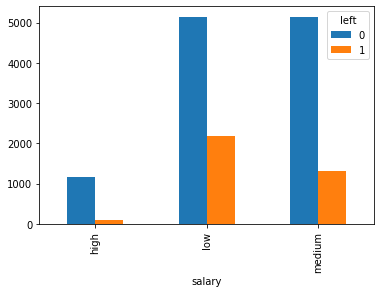

In [10]:
pd.crosstab( raw_data.salary, raw_data.left ).plot( kind='bar' )

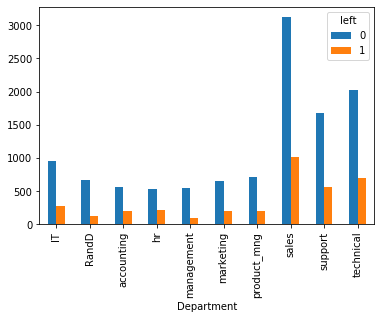

In [11]:
pd.crosstab( raw_data.Department, raw_data.left ).plot( kind='bar' )

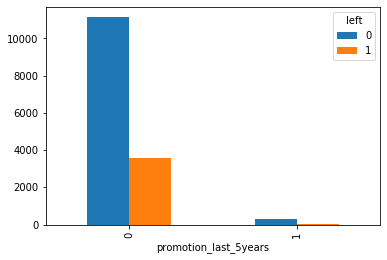

In [12]:
pd.crosstab( raw_data.promotion_last_5years, raw_data.left ).plot( kind='bar' )

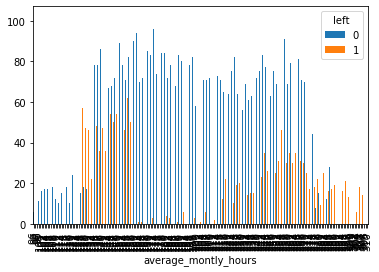

In [13]:
pd.crosstab( raw_data.average_montly_hours, raw_data.left ).plot( kind='bar' )

In [14]:
# CONVERT SALARY FROM TEXT TO NUMBERS WITH DUMMIES

In [15]:
x_salary_dummies = pd.get_dummies(x1['salary'])

In [16]:
x_with_dummies = pd.concat([x1,x_salary_dummies], axis =1)

In [17]:
x = x_with_dummies.drop('salary', axis=1)
y = raw_data['left']
x

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [18]:
# SPLIT INTO TRAIN AND TEST DATA 

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [20]:
# CREATE THE MODEL

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
reg_log=LogisticRegression()
reg_log.fit(x,y)

C:\Users\yuwa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# CHECK THE ACCURACY  OF THE MODEL

In [24]:
reg_log.score(x,y)

0.7759183945596373